# CA02 - Training Perceptron and Adaline models

Make sure you: a) describe briefly what you intend to do using markdown cells; b) comment your code properly but briefly, such that the reader can easily understand what the code is doing.


## Imports

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adaline import AdalineGD
from perceptron import Perceptron

# Import the relevant classes from adaline.py and perceptron.py in the classifiers folder

## Loading and exploring data


Visualise the raw data with appropriate plots and inspect it for possible outliers or inconsistencies. Comment briefly on what you see and how this will impact the performance of the perceptron and adaline. For this use no more than three sentences.

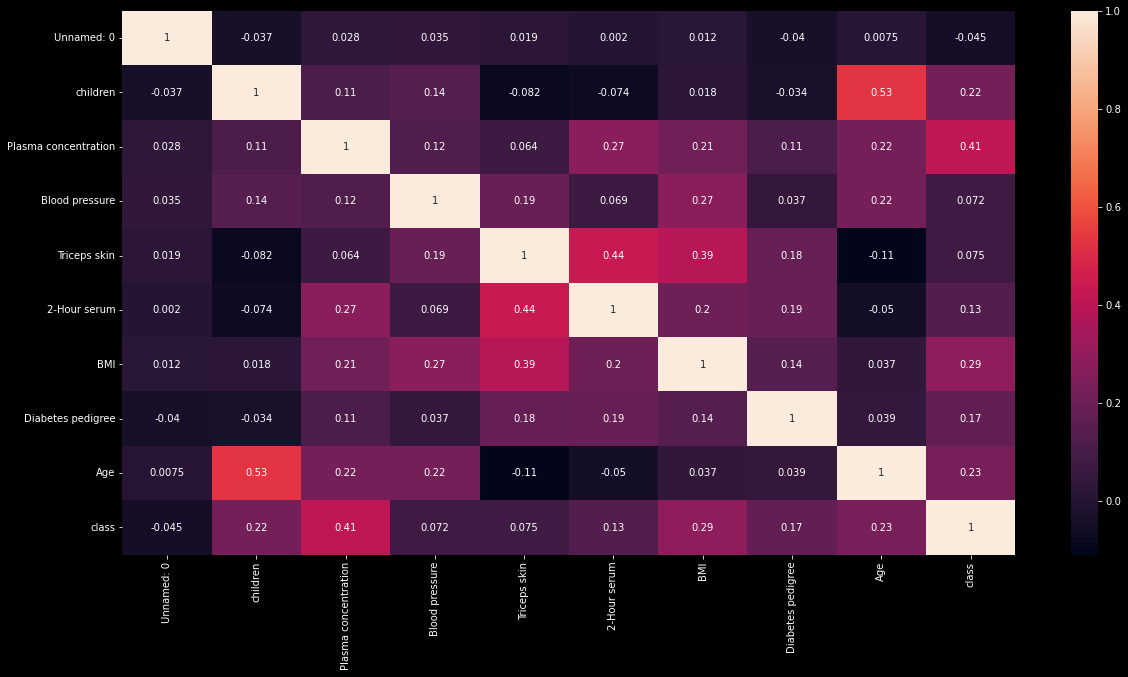

In [292]:
# Insert your code below
# ======================
raw_data  = pd.read_csv('diabetes_data.csv') # loading the data
nan_values = raw_data.isna().sum() # Checking for nan values , this gave a zero 
corr_data=raw_data[raw_data.columns].corr() # finding the correlation values

# Here is where we plot
plt.figure(figsize=(20,10))
sns.heatmap(corr_data, annot=True)
plt.show()

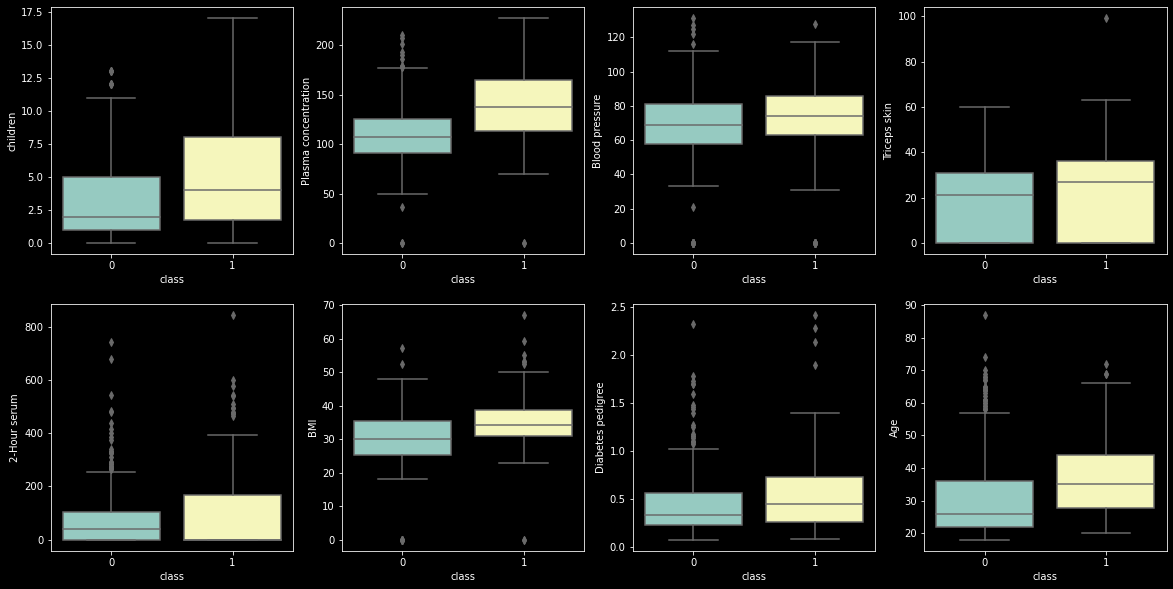

In [293]:
# The plot for boxplots, trying to understand the outliers of the problem
y = raw_data.columns[1:-1]
fig, axes = plt.subplots(2,4,figsize = (20,10))
for ycols,ax in zip(y, axes.flatten()):
    sns.boxplot(x = raw_data['class'], y = ycols, data = raw_data, ax = ax)
plt.show()

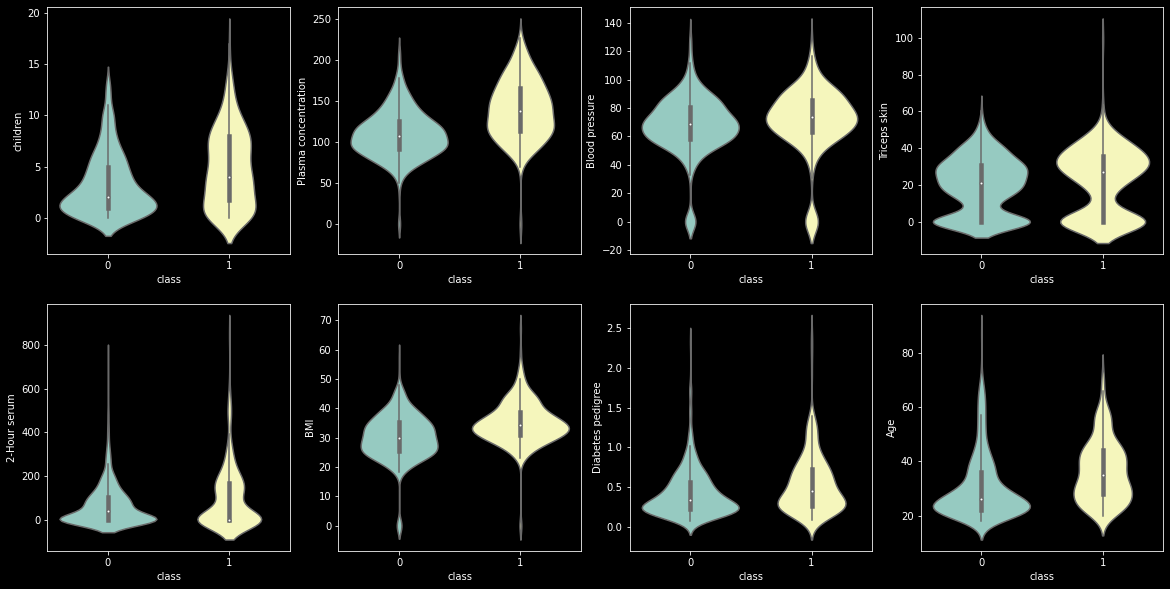

In [294]:
# The plot for violinplots, trying to understand the the connection between the data and the outliers of the problem
ycol = raw_data.columns[1:-1]
fig, axes = plt.subplots(2,4,figsize = (20,10))
for ycols,ax in zip(ycol, axes.flatten()):
    sns.violinplot(x = raw_data['class'], y = ycols, data = raw_data, ax = ax)
plt.show()

The outliers are seen to have an impact on the blood pressure column and they can effect the error variances making our model less accurate. The wise move would be deleting the 
outliers, however that would effect the learning precess and the fit. if the data set was larger, then maybe rethinking about the outliers would have easier.  Out fix however is that we scale the data
so that we have a uniformly shaped data which is good for our prediction. 

## Preprocessing data and training models

- Split the data into training and test_sets, where 400 samples are used for training, the remaing rows should be used for testing.
- Make sure the target values are appropriate for the Adaline and Perceptron classifiers
- Make sure that no data leakage occurs when scaling the data

With each of the 400 models, you should predict the classes of the unseen samples in the test data and compute the test set classification accuracy. Store the results in a (8 x 50) numpy array or a pandas dataframe.

__Preprocessing:__

In [295]:
# Insert your code below
# ======================
df = raw_data.copy() 
# seperatin the training set from the test set
xtrain = df.iloc[0:400, 1:-1]
ytrain = df.iloc[0:400, -1]
ytrain = np.where(ytrain == 1, 1,-1)

xtest  = df.iloc[400: , 1:-1]
ytest =  df.iloc[400: , -1]
ytest = np.where(ytest == 1, 1,-1)

# The scaling if the x values
x_scaled_train =(xtrain - np.mean(xtrain, axis=0))/ np.std(xtrain, axis = 0)
x_scaled_test = (xtest - np.mean(xtest, axis=0))/ np.std(xtest, axis = 0)


__Training:__

In [296]:
# Insert your code below
# ======================

# Empty numpy array that will be updated 
results_perceptron = np.zeros((8,50)) 
results_adaline    = np.zeros((8,50))

# The updating of the numpy arrays using the preceptron and adaline to train the data. 
for i in range (1,9):

    for j in range(1,51):
        
        xctr = x_scaled_train[:50*i].to_numpy()
        ytr = ytrain[:50*i]

        ppn = Perceptron(eta = 0.0001, n_iter=j).fit(xctr,ytr)
        ada = AdalineGD (eta=0.0001 , n_iter= j).fit(xctr,ytr)

        ypred_ppn = ppn.predict(x_scaled_test)
        ypred_ada = ada.predict(x_scaled_test)

        accuarcy_ppn = ((ytest == ypred_ppn).sum())/ x_scaled_test.shape[0]
        accuarcy_ada = ((ytest == ypred_ada).sum())/ x_scaled_test.shape[0]

        results_perceptron[i-1][j-1] = accuarcy_ppn
        results_adaline   [i-1][j-1] = accuarcy_ada

## Visualizing results

Plot a heatmap of the results (test set classification accuracy) using Python plotting packages matplotlib or seaborn . See canvas for images of what the heatmaps should look like for the two classification algorithms.

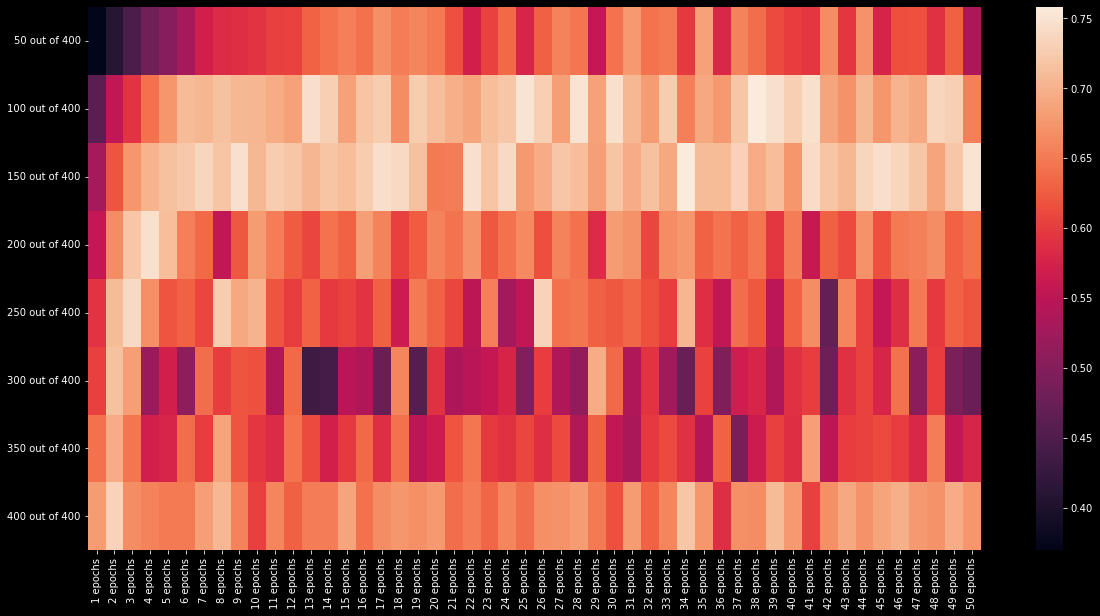

In [297]:

# Perceptron Heatmap

xticks = [f'{i} epochs' for i in range(1,51)]
yticks = [f'{i} out of 400' for i in range(50,450,50)]

plt.figure(figsize=(20,10))
sns.heatmap(results_perceptron, annot=False, xticklabels=xticks, yticklabels= yticks)
plt.show()

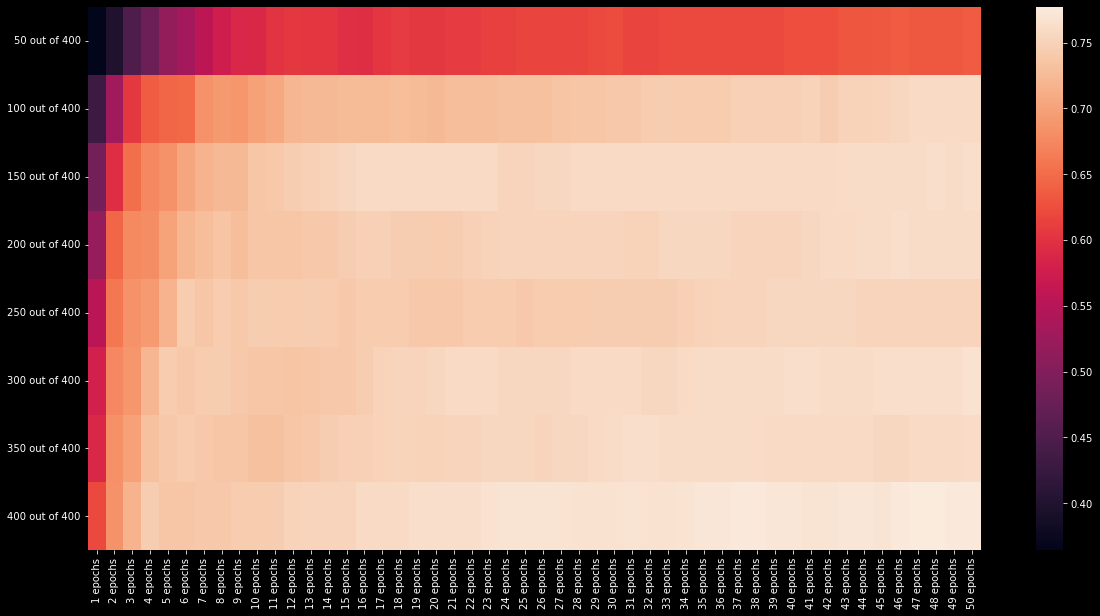

In [298]:
#Adaline Heatmap
xticks = [f'{i} epochs' for i in range(1,51)]
yticks = [f'{i} out of 400' for i in range(50,450,50)]

plt.figure(figsize=(20,10))
sns.heatmap(results_adaline, annot=False, xticklabels=xticks, yticklabels= yticks)
plt.show()

## Metrics

Provide the maximum test set classification accuracy for each, the perceptron classifier and the adaline classifier and information on with which combination of number training data samples and number of epochs the best classification accuracy was achieved. 

In [299]:
# Insert your code below
# ======================

# Perceptron

p_max = results_perceptron.max() # Finding the max value for the array
index =np.where( results_perceptron == np.amax(results_perceptron)) # Locating the indices with the max value

# The size of the data that gave us the max value
df_size_p1 = (index[0][0] + 1) * 50 
df_size_p2 = (index[0][1] + 1) * 50
# The epoch in which the high values were achieved
epoch_p1 = (index[1][0] + 1)
epoch_p2 = (index[1][1] + 1)

print(f'The perceptron had the highest values in two places, when the epoch is {epoch_p1} and {epoch_p2} for data sizes of {df_size_p1} and {df_size_p2} the highest accuarcy for both cases was {p_max}')

The perceptron had the highest values in two places, when the epoch is 38 and 34 for data sizes of 100 and 150 the highest accuarcy for both cases was 0.7581521739130435


In [300]:
# Insert your code below
# ======================

# Adaline

a_max = results_adaline.max()# Finding the max value for the array
index =np.where( results_adaline == np.amax(results_adaline)) # Locating the indices with the max value

# The size of the date that gave us the max value
df_size_a1 = (index[0][0] + 1) * 50

# The epoch in which the high values were achieved
epoch_a1 = (index[1][0] + 1)
epoch_a2 = (index[1][1] + 1)

print(f'The perceptron had the highest values in two places, when the epoch is {epoch_a1} and {epoch_a2} for data sizes of {df_size_a1} for both, and the highest accuarcy for both cases was {a_max}')

The perceptron had the highest values in two places, when the epoch is 47 and 48 for data sizes of 400 for both, and the highest accuarcy for both cases was 0.7771739130434783


## Discussion

1. The training time of the simpler perceptron algorithm is quite a bit longer than the training time of the adaline algorithm. What might be the reason for this?
2. The heatmap of the classification accuracy for the adaline algorithm is smoother than the perceptron heatmap. What might be the reason for this?

__Insert your answer below__

=====================

1) The difference in time is related to when the algorithms update their weights to get a better fit. Perceptron updates more often, and during one epoch. While Adaline updates after the epoch, thus having less iterations and less running time. 
2) The adaline uses a stochastic gradient descent approach to update the weights, while perceptron compares the updated weights with the older weight and corrects the value that way in the fitting precess. The continues use of the gradient descent, gives us a linear improvment of the fit. 

---